<a href="https://colab.research.google.com/github/Ryndhk/UAS_BDDM01/blob/main/UAS_BDDM01_5049.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Installasi**

In [1]:
!pip install kaggle
!pip install scikit-learn

In [2]:
import pandas as aku
import numpy as kamu
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import os

In [3]:
!pip install kaggle --upgrade

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d nelgiriyewithana/apple-quality

!unzip apple-quality.zip -d apple_quality_data

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
License(s): other
  0% 0.00/170k [00:00<?, ?B/s]
100% 170k/170k [00:00<00:00, 64.3MB/s]
Archive:  apple-quality.zip
  inflating: apple_quality_data/apple_quality.csv  


In [5]:
print("Files in current directory:", os.listdir('.'))
print("Files in apple_quality_data:", os.listdir('apple_quality_data'))

apple = aku.read_csv('/content/apple_quality_data/apple_quality.csv')

Files in current directory: ['.config', 'apple_quality_data', 'apple-quality.zip', 'sample_data']
Files in apple_quality_data: ['apple_quality.csv']


In [6]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [7]:
apple.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


## **Preprocessing**

In [8]:
print(apple['Acidity'].unique())

apple = aku.read_csv('/content/apple_quality_data/apple_quality.csv', skipfooter=1, engine='python')

apple = apple[apple['Acidity'] != 'Created_by_Nidula_Elgiriyewithana']

apple['Acidity'] = apple['Acidity'].astype('float64')

apple.info()

['-0.491590483' '-0.722809367' '2.621636473' ... '-2.229719806'
 '1.599796456' 'Created_by_Nidula_Elgiriyewithana']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [9]:
apple.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [10]:
selected_columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
correlation_matrix = apple[selected_columns].corr()

correlation_matrix

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000


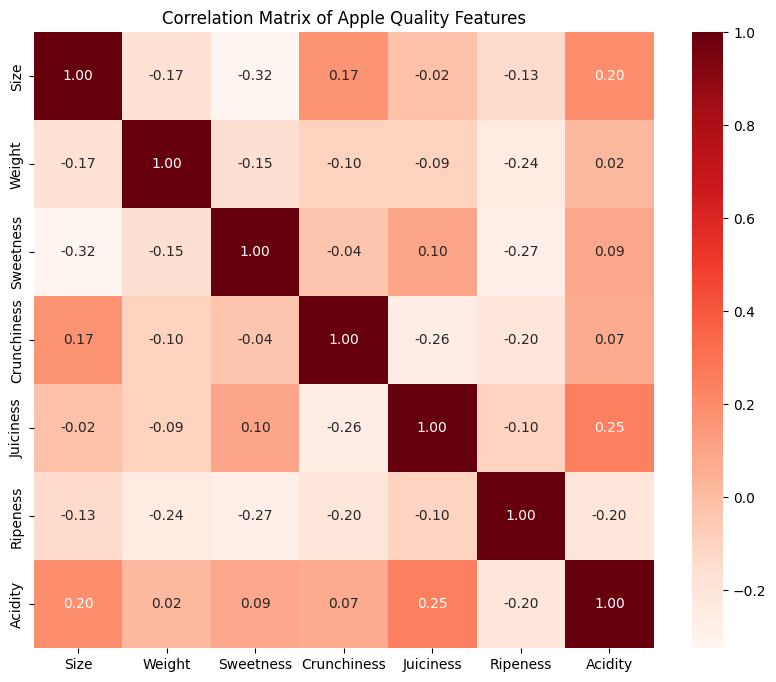

In [11]:
# prompt: tampilkan heatmap dari kode diatas

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Matrix of Apple Quality Features')
plt.show()

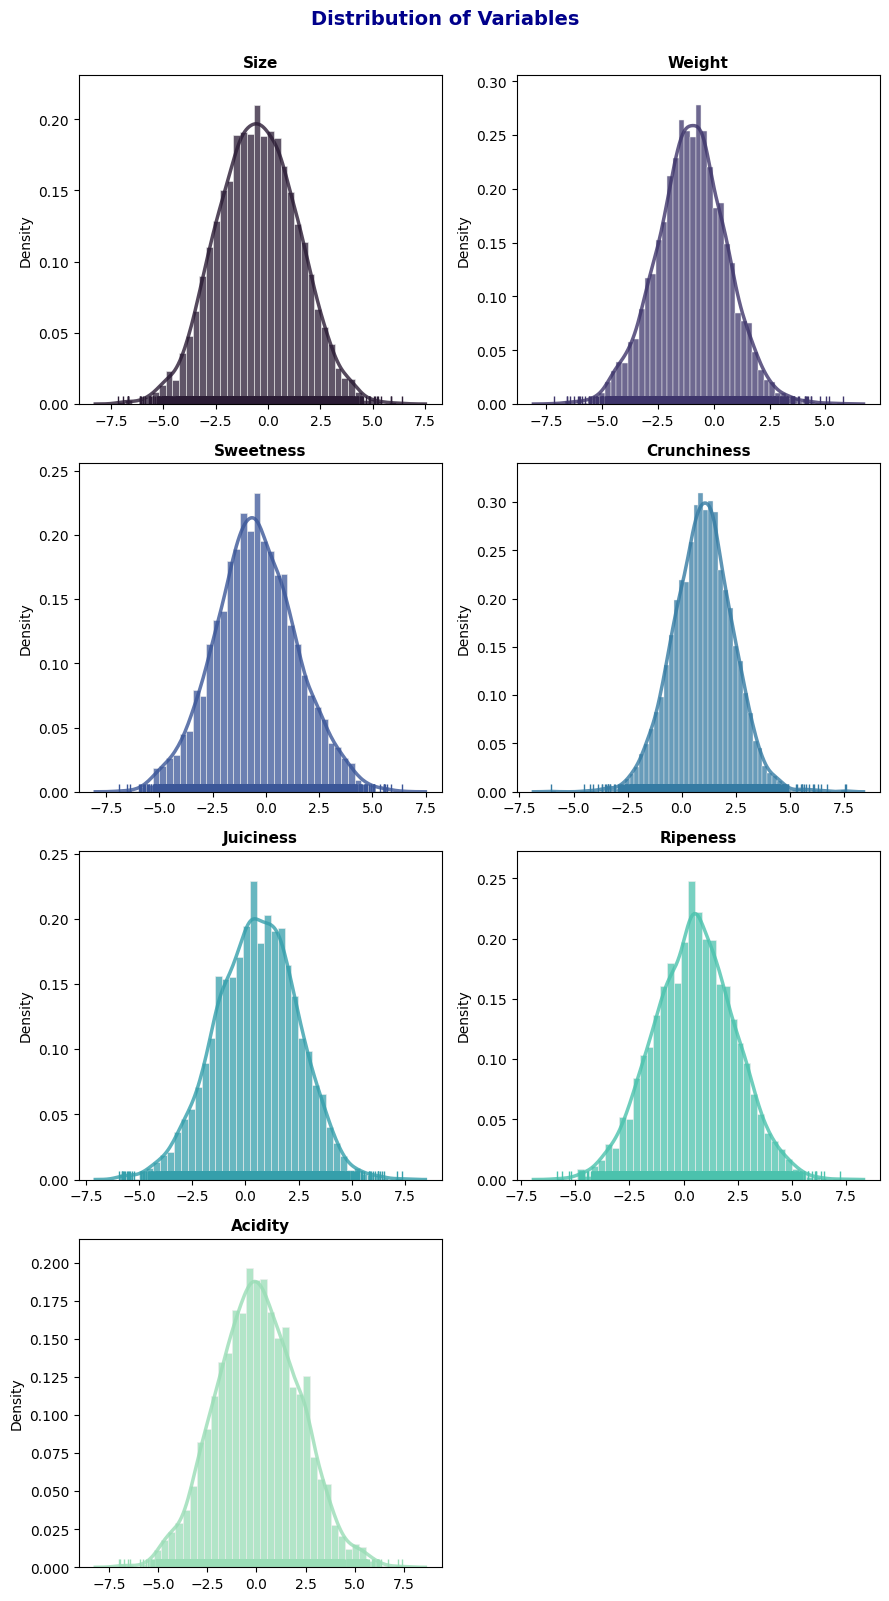

In [12]:
data = apple

cols = data.columns[:-1]
numeric_cols = [col for col in cols if col not in ['A_id', 'Quality']]

for col in numeric_cols:
    data[col] = aku.to_numeric(data[col], errors='coerce')

data = data.dropna(subset=numeric_cols)

colors = sns.color_palette('mako', len(numeric_cols))

num_cols = len(numeric_cols)
num_rows = (num_cols + 1) // 2
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(9, num_rows * 4))
plt.style.use("ggplot")
axs = axs.flat

#visualisasi untuk setiap kolom numerik
for i, col in enumerate(numeric_cols):
    sns.kdeplot(data, x=col, alpha=0.8, linewidth=2.5, color=colors[i], ax=axs[i])
    sns.histplot(data, x=col, stat='density', color=colors[i], ax=axs[i])
    sns.rugplot(data, x=col, color=colors[i], ax=axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(col, fontsize=11, fontweight="bold", color="black")

fig.suptitle("Distribution of Variables", fontsize=14, fontweight="bold", color="darkblue", y=0.998)

if num_cols < len(axs):
    for j in range(num_cols, len(axs)):
        fig.delaxes(ax=axs[j])

fig.tight_layout()
plt.show()

# **Feature dan Model ( algoritma Gradient Boosting Classifier)**

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       401
           1       0.88      0.88      0.88       399

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800

ROC AUC Score: 0.9377058606616292


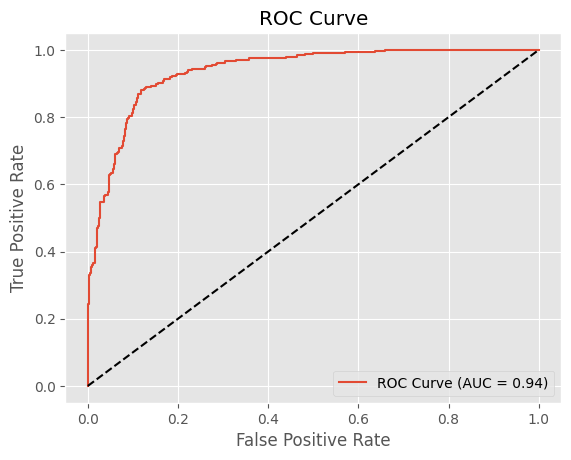

In [13]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Pisahkan fitur (X) dan target (y)
X = data.drop('Quality', axis=1)
y = data['Quality']

# Encode label jika diperlukan (jika label bukan numerik)
le = LabelEncoder()
y = le.fit_transform(y)

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)  # Anda dapat menyesuaikan hyperparameter di sini
gbc.fit(X_train, y_train)

# Lakukan prediksi pada data testing
y_pred = gbc.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred))

# ROC AUC Score
y_prob = gbc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

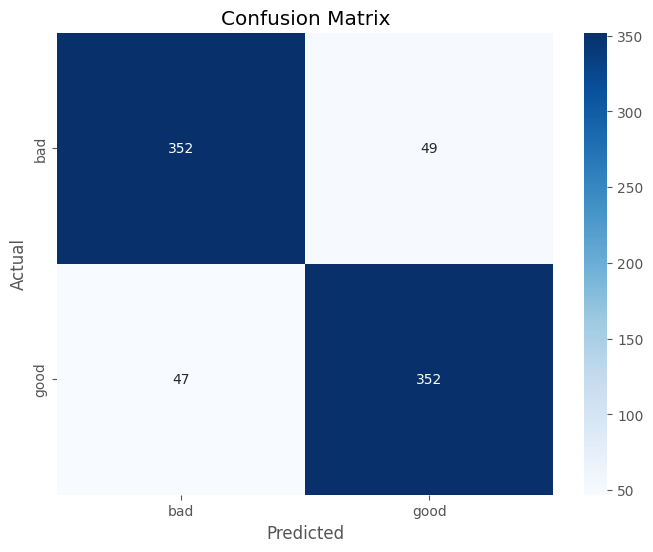

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()